# Innovacer Data Science Assignment
### Task A :Build a classifier to predict the outcome of a new patient with high accuracy.

In [1]:
# Here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
#---------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression as LR # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.preprocessing import LabelEncoder 
from sklearn import linear_model, neighbors
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR

In [2]:
# Reading Data
data = pd.read_excel('Input.xlsx',header=0)
dataset = data.copy()
print(data.shape)
data.head()

(198, 35)


,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


##### Preprocessing and Cleaning of Data

In [3]:
# Dropping Id column as we dont need it for our analysis
data.drop('ID',axis=1,inplace=True)
#Handling NA Values
x = data['Lymph_Node_Status'].mode()[0]
data = data.replace('?',x)
#Handling object type data type
data['Outcome']=data['Outcome'].map({'R':1,'N':0})

In [4]:
# So now we divide data into three parts.Dividing the features according to their category
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_std_dev', 'texture_std_dev', 'perimeter_std_dev', 'area_std_dev', 'smoothness_std_dev', 'compactness_std_dev', 'concavity_std_dev', 'concave_points_std_dev', 'symmetry_std_dev', 'fractal_dimension_std_dev']
------------------------------------
['Worst_radius', 'Worst_texture', 'Worst_perimeter', 'Worst_area', 'Worst_smoothness', 'Worst_compactness', 'Worst_concavity', 'Worst_concave_points', 'Worst_symmetry', 'Worst_fractal_dimension']


#### Exploratory Data Analysis

Text(0.5, 1.0, 'Outcome (R=1 , N=0)')

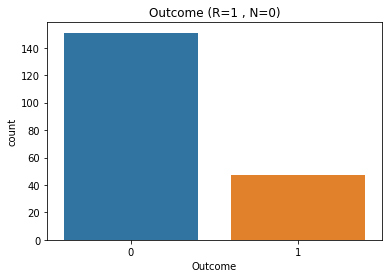

In [5]:
#Frequency of cancer Type
sns.countplot(data['Outcome'],label="Count")
ax = plt.gca()
ax.set_title('Outcome (R=1 , N=0)')

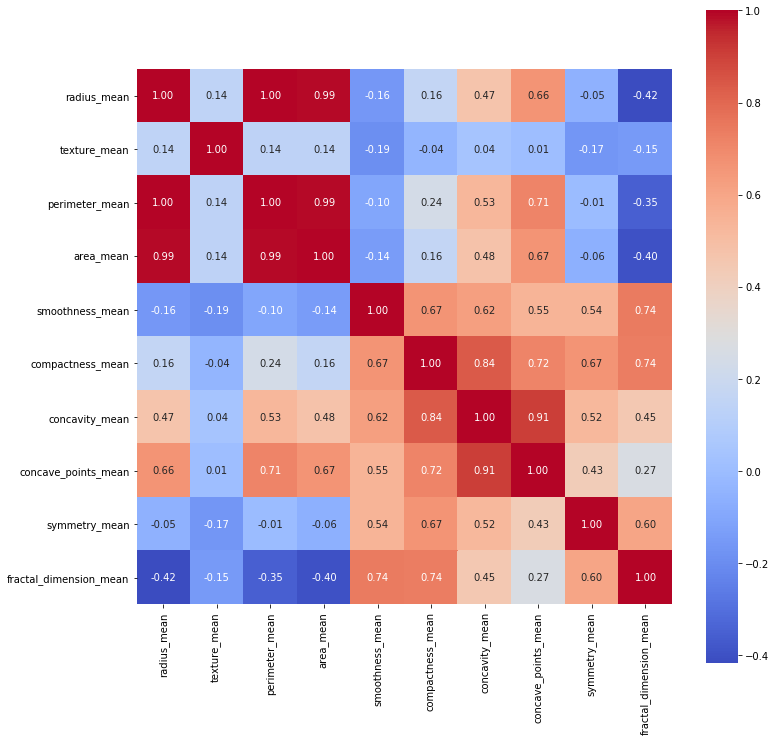

In [6]:
# Making a correlation graph so that we can remove Multi Collinearity for 3 categories divided earlier

corr = data[features_mean].corr() 
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},xticklabels= features_mean,
            yticklabels= features_mean,cmap= 'coolwarm') 

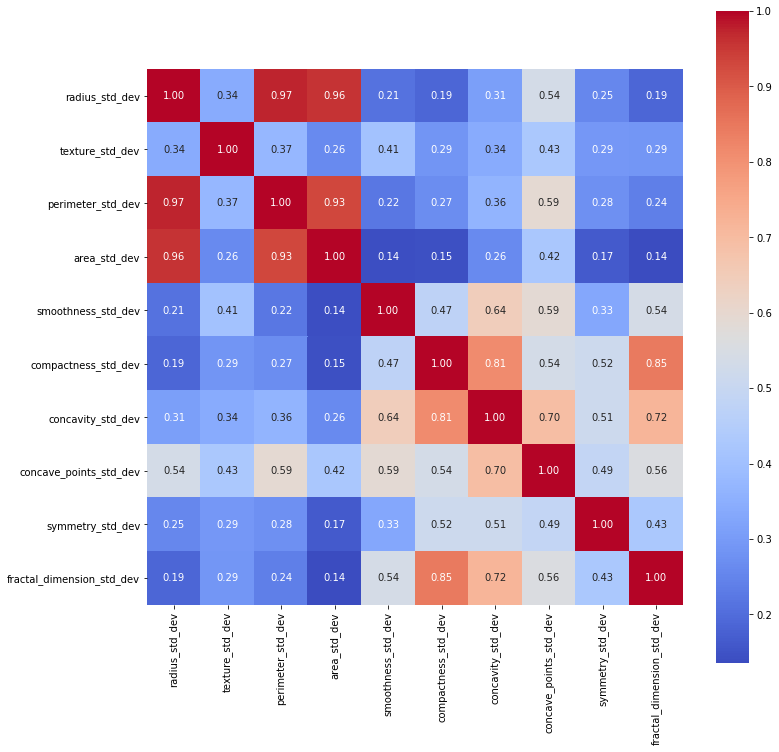

In [7]:
corr = data[features_se].corr() 
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},xticklabels= features_se, 
            yticklabels= features_se,cmap= 'coolwarm') 

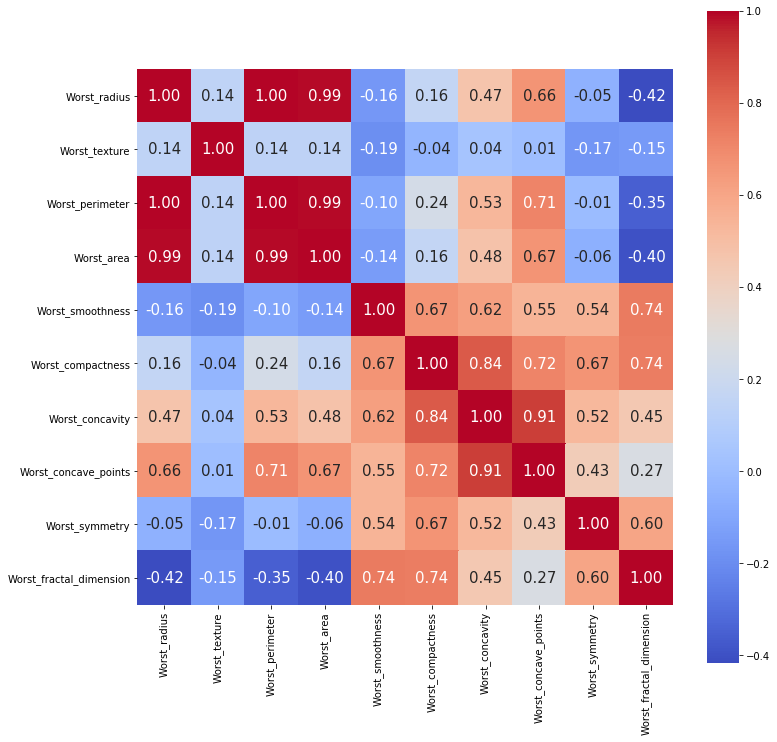

In [8]:
corr = data[features_mean].corr() 
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},xticklabels= features_worst, 
            yticklabels = features_worst,cmap= 'coolwarm') 

#### Prediction  Using Different Variables :-

In [9]:
#(1) Now using different features based on the analysis of Heat map Features these features are selected
prediction_var = ['Time','Tumor_Size','Lymph_Node_Status','texture_mean','perimeter_mean','concavity_mean','smoothness_mean','symmetry_mean','fractal_dimension_mean',
                 'radius_std_dev','concavity_std_dev','texture_std_dev','smoothness_std_dev','symmetry_std_dev','fractal_dimension_std_dev',
                 'Worst_radius', 'Worst_texture','Worst_smoothness','Worst_concavity','Worst_symmetry', 'Worst_fractal_dimension']

In [10]:
#Splitting Data in Training and Test Set
train, test = train_test_split(data, test_size = 0.3)

#Taking the training data input with above prediction variables mentioned
train_X = train[prediction_var]
train_y=train.Outcome

# Test Data
test_X= test[prediction_var] 
test_y =test.Outcome    

#### Prediction of Model Based on Feature Selected by us through analysis of Heat Map  :-

In [11]:
#======================Randome Forest Classifier======================================
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y) 

0.8

In [12]:
output = pd.DataFrame({'Actual':test_y,'Predicted':prediction})
output.to_csv('taskA.csv',index=False)

In [13]:
#===========================SVM========================================================
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8

#### Now we are taking Mean Features for Precdiction 

In [14]:
prediction_var = features_mean 

In [15]:
#Prediction Variables are all the features of Mean only
train_X= train[prediction_var]
train_y= train.Outcome
test_X = test[prediction_var]
test_y = test.Outcome

In [16]:
#======================Randome Forest Classifier======================================
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8

In [17]:
#===================================SVM==================================================
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8

In [18]:
#Now using the property of Random Forest classifier to select impotant features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) 

AttributeError: 'SVC' object has no attribute 'feature_importances_'

#### Using Top 6 Features Given by Random Forest Classifier as Important Features 

In [19]:
prediction_var=['symmetry_mean','texture_mean','concave_points_mean','concavity_mean','fractal_dimension_mean','smoothness_mean']     

In [20]:
train_X= train[prediction_var]
train_y= train.Outcome
test_X = test[prediction_var]
test_y = test.Outcome

In [21]:
#===================================Random Forest Classifier=============================================
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.7833333333333333

In [22]:
#=========================================SVM============================================================
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8

### Checking Accuracy of Different Machine Learing Models 

In [23]:
def model(model,data,prediction,outcome):
   kf = KFold(data.shape[0], n_folds=10) # if you have refer the link then you must understand what is n_folds
    

In [24]:
#This model can be used for different models
#This time taking all the columns as features for predicting
#predictor_var  = data.columns
def classification_model(model,data,prediction_input,output):

    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data[prediction_input]):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
       
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    

## Testing Different Models for Different Prediction Features

In [25]:
#=========================================Decision Tree Classifier=========================================================
model = DecisionTreeClassifier()
prediction_var = ['Time','Tumor_Size','Lymph_Node_Status','texture_mean','perimeter_mean','concavity_mean','smoothness_mean','symmetry_mean','fractal_dimension_mean',
                 'radius_std_dev','concavity_std_dev','texture_std_dev','smoothness_std_dev','symmetry_std_dev','fractal_dimension_std_dev',
                 'Worst_radius', 'Worst_texture','Worst_smoothness','Worst_concavity','Worst_symmetry', 'Worst_fractal_dimension']
outcome_var= "Outcome"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 67.500%
Cross-Validation Score : 70.000%
Cross-Validation Score : 68.333%
Cross-Validation Score : 68.558%
Cross-Validation Score : 66.641%


In [26]:
#=================================================SVM======================================================================
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 76.263%
Cross-Validation Score : 77.500%
Cross-Validation Score : 73.750%
Cross-Validation Score : 76.667%
Cross-Validation Score : 73.526%
Cross-Validation Score : 75.744%


In [27]:
#=============================================Kn-classifier================================================================
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 82.828%
Cross-Validation Score : 75.000%
Cross-Validation Score : 72.500%
Cross-Validation Score : 76.667%
Cross-Validation Score : 74.167%
Cross-Validation Score : 67.538%


In [28]:
#==========================================Random Forest Classifier===========================================================
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 80.000%
Cross-Validation Score : 80.000%
Cross-Validation Score : 81.667%
Cross-Validation Score : 79.199%
Cross-Validation Score : 79.256%


### Performing Grid Search CV 

In [29]:
data_X= data[prediction_var]
data_y= data["Outcome"]

In [30]:
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)

In [31]:
#----------------------------------Decision Tree Classifier---------------------------------------------------------
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)
# call our function

The best parameter found on development set is :
{'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 4}
the bset estimator is 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The best score is 
0.8043956043956044


In [32]:
#------------------------------------KNeighbour Classifier----------------------------------------------------------------------
model = KNeighborsClassifier()
k_range = list(range(1, 15))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 2, 'weights': 'uniform'}
the bset estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
The best score is 
0.7467032967032967


In [33]:
#-----------------------------------------------SVM-----------------------------------------------------------------------------
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 1, 'kernel': 'linear'}
the bset estimator is 
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The best score is 
0.7467032967032967
